#### Name: Ananya Godse SAP ID: 60009220161

#### Importing libraries

In [1]:
from numpy import std, mean, arange
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification, make_regression
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, RepeatedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

### Iris Dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

#### Splitting the data into training and testing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Default AdaBoost Classifier

In [4]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

#### Using a Naive Bayes Gaussian Classifer as the Base Learner

In [6]:
gaussian = GaussianNB()
clf1 = AdaBoostClassifier(estimator=gaussian)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

In [7]:
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy1

1.0

#### Using a Logistic Regressor as the Base Learner

In [8]:
logreg = LogisticRegression()
clf2 = AdaBoostClassifier(estimator=logreg)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

In [9]:
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy2

0.9666666666666667

### Synthetic Dataset with K - Cross Fold Validation

#### Default AdaBoost Classifier

In [10]:
X1, y1 = make_classification(n_samples=1000, n_informative=15, n_redundant=5, random_state=42, n_features=20)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
model = AdaBoostClassifier()
n_scores = cross_val_score(model, X1, y1, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise")
print(f"Mean = {mean(n_scores):.2f} and Standard deviation = {std(n_scores):.2f}")

Mean = 0.82 and Standard deviation = 0.03


In [11]:
model.fit(X1, y1)

row = [[ 2.4825477 ,  5.33328897, -0.9083723 , -2.30440308,  2.14957035,
       -1.12704206,  1.51310647,  0.05516024, -2.32440659, -2.08010276,
       -0.01265744,  2.88250102, -3.42867199, -2.80708089, -3.29485915,
       -4.89135836, -4.32496882, -2.70950144,  0.72359999,  0.45140537]]

y_hat = model.predict(row)
print(f"Predicted class is {y_hat}")

Predicted class is [1]


#### Using a Logistic Regressor as the Base Learner

In [12]:
logreg1 = LogisticRegression()
model1 = AdaBoostClassifier(estimator=logreg)
n_scores1 = cross_val_score(model1, X1, y1, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise")
print(f"Mean is {mean(n_scores1):.2f} and Standard deviation is {std(n_scores1):.2f}")

Mean is 0.82 and Standard deviation is 0.04


In [13]:
model1.fit(X1, y1)
y_hat1 = model1.predict(row)
print(f"Predicted class is {y_hat1}")

Predicted class is [1]


### AdaBoost Regressor

In [14]:
X2, y2 = make_regression(n_samples=1000, n_informative=15, random_state=6, n_features=20, noise=0.1)
model2 = AdaBoostRegressor()
cv1 = RepeatedKFold(n_splits=10)
n_scores2 = cross_val_score(model2, X2, y2, scoring="neg_mean_absolute_error", cv=cv1, n_jobs=-1, error_score="raise")
print(f"Mean is {mean(n_scores2):.2f} and Standard deviation is {std(n_scores2):.2f}")

Mean is -73.08 and Standard deviation is 6.38


### Hyperparameter Tuning

Model : 0.100 
 Mean = 0.77 and Standard deviation = 0.03 


Model : 0.200 
 Mean = 0.79 and Standard deviation = 0.03 


Model : 0.300 
 Mean = 0.81 and Standard deviation = 0.03 


Model : 0.400 
 Mean = 0.83 and Standard deviation = 0.04 


Model : 0.500 
 Mean = 0.82 and Standard deviation = 0.04 


Model : 0.600 
 Mean = 0.82 and Standard deviation = 0.03 


Model : 0.700 
 Mean = 0.83 and Standard deviation = 0.03 


Model : 0.800 
 Mean = 0.83 and Standard deviation = 0.03 


Model : 0.900 
 Mean = 0.82 and Standard deviation = 0.04 


Model : 1.000 
 Mean = 0.82 and Standard deviation = 0.04 


Model : 1.100 
 Mean = 0.82 and Standard deviation = 0.03 


Model : 1.200 
 Mean = 0.81 and Standard deviation = 0.03 


Model : 1.300 
 Mean = 0.82 and Standard deviation = 0.04 


Model : 1.400 
 Mean = 0.80 and Standard deviation = 0.03 


Model : 1.500 
 Mean = 0.79 and Standard deviation = 0.04 


Model : 1.600 
 Mean = 0.80 and Standard deviation = 0.03 


Model : 1.700 
 Mean = 0

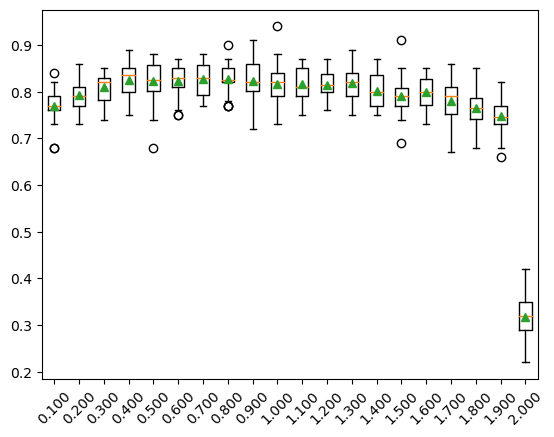

In [15]:
def get_dataset():
    X, y = make_classification(n_samples=1000, n_informative=15, n_redundant=5, random_state=42, n_features=20)
    return X, y


def get_model():
    models = {}

    for i in arange(0.1, 2.1, 0.1):
        key = "%.3f"%i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models


def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    n_scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise")
    return n_scores


X3, y3 =  get_dataset()

models = get_model()

results, names = [], []

for name, model in models.items():
    scores = evaluate_model(model, X3, y3)
    results.append(scores)
    names.append(name)
    print(f"Model : {name} \n Mean = {mean(scores):.2f} and Standard deviation = {std(scores):.2f} \n\n")

plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

#### Using GridSearchCV

In [17]:
grid = dict()
X4, y4 = make_classification(n_samples=1000, n_informative=15, n_redundant=5, random_state=42, n_features=20)
grid["n_estimators"] = [50, 100, 150, 500]
grid["learning_rate"] = [0.0001, 0.001, 0.01, 0.1, 1.0]
cv2 = RepeatedStratifiedKFold(n_splits= 10, n_repeats=3)

model3 = AdaBoostClassifier()

grid_search = GridSearchCV(estimator=model3, param_grid=grid, n_jobs=-1, cv=cv2, scoring="accuracy")
grid_result = grid_search.fit(X4, y4)

print(f"Best Score is {grid_result.best_score_:.2f} using {grid_result.best_params_}")

means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, std, param in zip(means, stds, params):
    print(f"Means = {mean:.2f}  & Standard Deviation = {std:.2f}  using {param} \n")

Best Score is 0.84 using {'learning_rate': 0.1, 'n_estimators': 500}
Means = 0.69  & Standard Deviation = 0.05  using {'learning_rate': 0.0001, 'n_estimators': 50} 

Means = 0.69  & Standard Deviation = 0.05  using {'learning_rate': 0.0001, 'n_estimators': 100} 

Means = 0.69  & Standard Deviation = 0.05  using {'learning_rate': 0.0001, 'n_estimators': 150} 

Means = 0.69  & Standard Deviation = 0.05  using {'learning_rate': 0.0001, 'n_estimators': 500} 

Means = 0.69  & Standard Deviation = 0.05  using {'learning_rate': 0.001, 'n_estimators': 50} 

Means = 0.69  & Standard Deviation = 0.05  using {'learning_rate': 0.001, 'n_estimators': 100} 

Means = 0.69  & Standard Deviation = 0.05  using {'learning_rate': 0.001, 'n_estimators': 150} 

Means = 0.69  & Standard Deviation = 0.05  using {'learning_rate': 0.001, 'n_estimators': 500} 

Means = 0.69  & Standard Deviation = 0.05  using {'learning_rate': 0.01, 'n_estimators': 50} 

Means = 0.70  & Standard Deviation = 0.05  using {'learnin